# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print (len(cities))


583


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#small_city_list = ['saint-philippe','newtownards','hobart','rikitea','qaanaaq','marcona','vaini','yekaterinoslavka',
#                   'hailey','filingue','alofi','cabo san lucas','grindavik','new norfolk']
#for a in small_city_list:

for a in cities:
    
    response = requests.get(query_url + a).json()

    try:
        
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city.append(a)
        print(f"City {a} found.")

    except:
        
        print(f"City {a} not found.")
        pass

weather_dict = {
    'City' : city,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date' : date
    
}

weather_data = pd.DataFrame(weather_dict)



City rolim de moura not found.
City bengkulu found.
City tuktoyaktuk found.
City cape town found.
City richards bay found.
City tiksi found.
City ushuaia found.
City taolanaro not found.
City porto novo found.
City kokopo found.
City kalagarh found.
City bluff found.
City mys shmidta not found.
City ayacucho found.
City port hedland found.
City new norfolk found.
City maniitsoq found.
City amderma not found.
City arlit found.
City rikitea found.
City barentsburg not found.
City voh found.
City omsukchan found.
City busselton found.
City punta arenas found.
City puerto ayora found.
City necochea found.
City bathsheba found.
City gizo found.
City grand river south east not found.
City jamestown found.
City luganville found.
City misratah found.
City coquimbo found.
City mataura found.
City vagur found.
City albany found.
City saint george found.
City kyrksaeterora found.
City lima found.
City burns lake found.
City palmer found.
City narasannapeta found.
City hithadhoo found.
City hilo f

City aurillac found.
City alofi found.
City fort nelson found.
City wahiawa found.
City lakes entrance found.
City wiwili found.
City hofn found.
City aksu found.
City sibu found.
City saleaula not found.
City ardrishaig found.
City yichang found.
City santa maria found.
City hirado found.
City bonavista found.
City quang ngai found.
City srednekolymsk found.
City pochutla found.
City aswan found.
City sungairaya found.
City varzea da palma found.
City dzilam gonzalez found.
City capitao poco found.
City lodja found.
City itaituba found.
City astorga found.
City luderitz found.
City sola found.
City prince rupert found.
City olafsvik found.
City paris found.
City high level found.
City labuhan found.
City zhigansk found.
City narsaq found.
City novo horizonte found.
City waipawa found.
City sentyabrskiy not found.
City mercedes found.
City dubrovka found.
City durban found.
City macaboboni not found.
City kamenskoye not found.
City pustoshka found.
City port lincoln found.
City pavagad

 Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [4]:
weather_data.to_csv('output_data/cities.csv', header=True)
#weather_data.to_csv(output_data_file, header=True)
#weather_data[weather_data['Humidity'] > 99]

In [5]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bengkulu,-3.8004,102.2655,76.10,89,100,2.89,ID,1666554984
1,tuktoyaktuk,69.4541,-133.0374,14.00,85,75,5.75,CA,1666555161
2,cape town,-33.9258,18.4232,68.41,76,0,21.85,ZA,1666555162
3,richards bay,-28.7830,32.0377,69.89,93,82,2.28,ZA,1666554939
4,tiksi,71.6872,128.8694,21.13,93,100,11.16,RU,1666555162


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data[weather_data['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

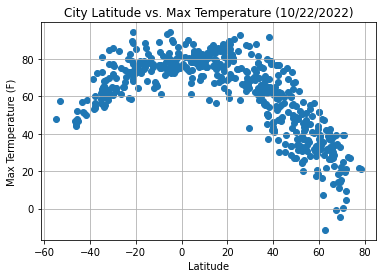

In [8]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker='o')
plt.title('City Latitude vs. Max Temperature (10/22/2022)')
plt.ylabel('Max Termperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('../Images/TemperatureInWorldCities.png')

plt.show()

## Latitude vs. Humidity Plot

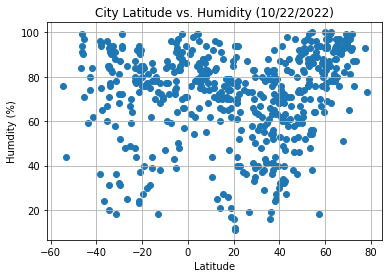

In [9]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker='o')
plt.title('City Latitude vs. Humidity (10/22/2022)')
plt.ylabel('Humdity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('../Images/HumidityInWorldCities.png')

plt.show()

## Latitude vs. Cloudiness Plot

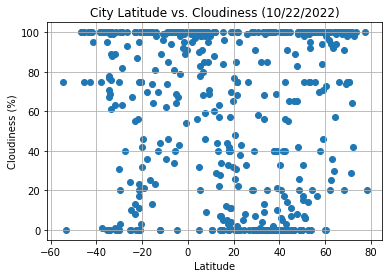

In [10]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='o')
plt.title('City Latitude vs. Cloudiness (10/22/2022)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('../Images/CloudinessInWorldCities.png')

plt.show()

## Latitude vs. Wind Speed Plot

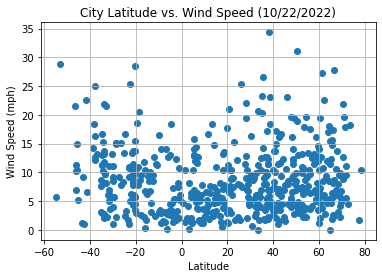

In [11]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker='o')
plt.title('City Latitude vs. Wind Speed (10/22/2022)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('../Images/WindSpeedInWorldCities.png')

plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.854334551342606
y = -0.93x + 92.62


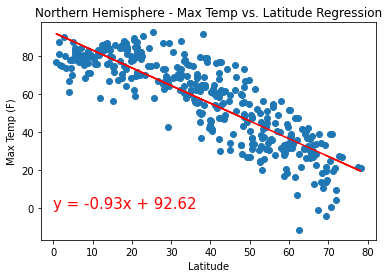

In [12]:
x_values = weather_data[weather_data['Lat'] >= 0]['Lat']
y_values = weather_data[weather_data['Lat'] >= 0]['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Regression')

print(f"The r-value is: {rvalue}")
print(line_eq)
plt.savefig('../Images/LinearNorthernTemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7298856792072108
y = 0.6x + 84.0


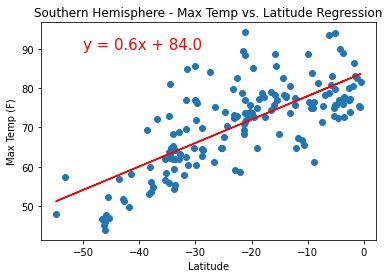

In [21]:
x_values = weather_data[weather_data['Lat'] < 0]['Lat']
y_values = weather_data[weather_data['Lat'] < 0]['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Regression')

print(f"The r-value is: {rvalue}")
print(line_eq)
plt.savefig('../Images/LinearSouthernTemp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23619319316786785
y = 0.24x + 62.11


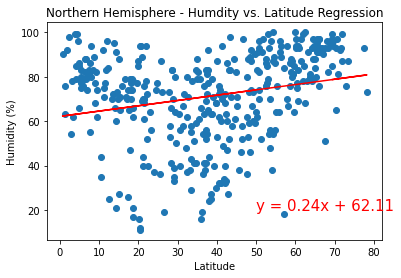

In [22]:
x_values = weather_data[weather_data['Lat'] >= 0]['Lat']
y_values = weather_data[weather_data['Lat'] >= 0]['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Northern Hemisphere - Humdity vs. Latitude Regression')

print(f"The r-value is: {rvalue}")
print(line_eq)
plt.savefig('../Images/LinearNorthernHumidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.00434817830132444
y = -0.01x + 72.29


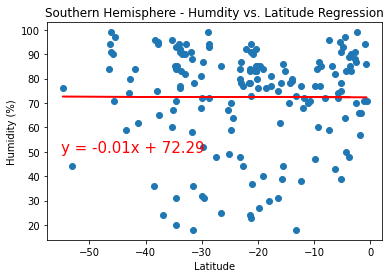

In [25]:
x_values = weather_data[weather_data['Lat'] < 0]['Lat']
y_values = weather_data[weather_data['Lat'] < 0]['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Southern Hemisphere - Humdity vs. Latitude Regression')

print(f"The r-value is: {rvalue}")
print(line_eq)
plt.savefig('../Images/LinearSouthernHumidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1844794000686013
y = 0.38x + 44.44


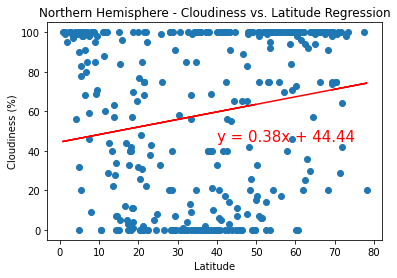

In [26]:
x_values = weather_data[weather_data['Lat'] >= 0]['Lat']
y_values = weather_data[weather_data['Lat'] >= 0]['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Regression')

print(f"The r-value is: {rvalue}")
print(line_eq)
plt.savefig('../Images/LinearNorthernClouds.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07138690481172028
y = 0.2x + 73.2


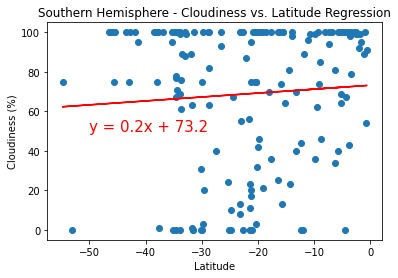

In [27]:
x_values = weather_data[weather_data['Lat'] < 0]['Lat']
y_values = weather_data[weather_data['Lat'] < 0]['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Regression')

print(f"The r-value is: {rvalue}")
print(line_eq)
plt.savefig('../Images/LinearSouthernClouds.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.19098014607857305
y = 0.05x + 6.3


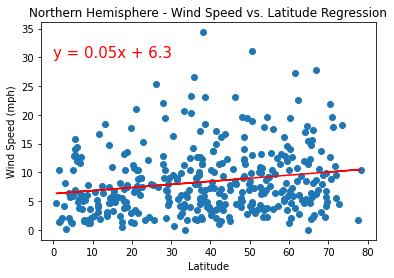

In [28]:
x_values = weather_data[weather_data['Lat'] >= 0]['Lat']
y_values = weather_data[weather_data['Lat'] >= 0]['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Regression')

print(f"The r-value is: {rvalue}")
print(line_eq)
plt.savefig('../Images/LinearNorthernWind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3584069623608399
y = -0.16x + 5.11


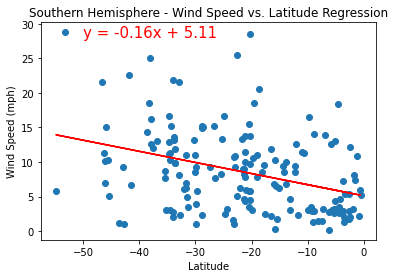

In [30]:
x_values = weather_data[weather_data['Lat'] < 0]['Lat']
y_values = weather_data[weather_data['Lat'] < 0]['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-50,28),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Regression')

print(f"The r-value is: {rvalue}")
print(line_eq)
plt.savefig('../Images/LinearSouthernWind.png')
plt.show()